In [23]:
import pandas as pd
import os as os
import numpy as np
%matplotlib inline

In [24]:
print(os.getcwd())

/home/alain/Trading/TradingEvolved/PythonTests


In [25]:
data = pd.read_csv('../data/chapter6/sp500.csv', index_col='Date', parse_dates=['Date'])

In [26]:
data['SMA50'] = data['SP500'].rolling(50).mean()
data['SMA100'] = data['SP500'].rolling(100).mean()

<Axes: xlabel='Date'>

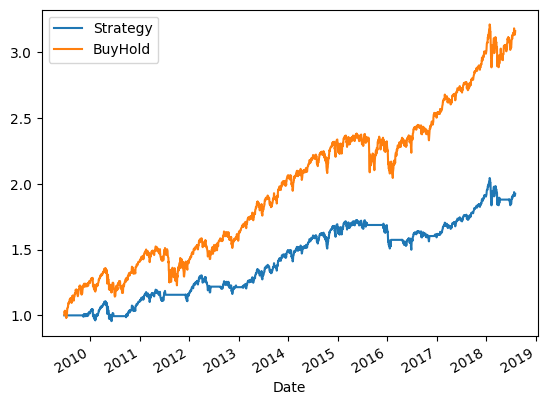

In [39]:
data['Position'] = np.where(data['SMA50'] > data['SMA100'], 1, 0)
data['Position'] = data['Position'].shift()
data['StrategyPct'] = data['SP500'].pct_change(1) * data['Position']
data['Strategy'] = (data['StrategyPct'] + 1).cumprod()
data['BuyHold'] = (data['SP500'].pct_change(1) + 1).cumprod()
data[['Strategy', 'BuyHold']].plot()